In [977]:
import math
import sympy

In [978]:
#k_0の設定
def set_k_0(lamb):
    return  (2*pi) / lamb

#近似解
def set_n_0(n_c , n_f , n_s , k_0 , T, m):
    gamma_c = k_0 * (math.pow(n_f,2) - math.pow(n_c,2)) ** 0.5
    gamma_s = k_0 * (math.pow(n_f,2) - math.pow(n_s,2)) ** 0.5
    T_eff = T + 1/gamma_c + 1/ gamma_s
    return  n_f - ((m+1)*pi / T_eff)/(2*k_0*n_f)

#超越方程式
def f(N,k_x,m):
    return (k_x*T - (m+1)*pi + sympy.atan(k_x / gamma_c) + sympy.atan(k_x / gamma_s) ) 

#微分
def df(N):
    return -N*T*k_0*(-N**2 + n_f**2)**(-0.5) - N*(-N**2 + n_f**2)**(-0.5)*(-n_c**2 + n_f**2)**0.5/((-N**2 + n_f**2)*(-n_c**2 + n_f**2) + 1) - N*(-N**2 + n_f**2)**(-0.5)*(n_f**2 - n_s**2)**0.5/((-N**2 + n_f**2)*(n_f**2 - n_s**2) + 1)

#k_x
def set_k_x(k_0,n_f,N):
    return (k_0* (n_f**2 - N**2)**0.5)

#gamma_c
def set_gamma_c(k_0,n_f,n_c):
    return k_0 * ((n_f**2 - n_c**2)) ** 0.5

#gamma_s
def set_gamma_s(k_0,n_f,n_s):
    return k_0 * ((n_f**2 -n_s**2)) ** 0.5

#ニュートン法
def newton_method(m,eps=1e-5):
    #初期値
    N_0 = set_n_0(n_c , n_f , n_s , k_0 , T, m) 
    while True: 
        #Nでk_xを更新
        k_x = set_k_x(k_0,n_f,N_0) 
        N_1 = N_0 - (f(N_0,k_x,m) / df(N_0))
        print("N_0:",N_0,"N_1:",N_1)
        if(abs(N_1 - N_0) < eps):
            return N_1
        N_0 = N_1

In [979]:
#問題で与えられた値設定
micro = 1e-6
n_c = 3.3
n_f = 3.5
n_s = 3.4
T = 1 #* micro
lamd = 0.86 #*micro

#初期値設定
#k_0
k_0 = set_k_0(lamd) 
#gamma_c
gamma_c = set_gamma_c(k_0,n_f,n_s)
#gamma_s
gamma_s = set_gamma_s(k_0,n_f,n_s)
#k_x
k_x = set_k_x(k_0,n_f,n_0) 

In [980]:
#ニュートン法でNを求める
result_n_0 = newton_method(0)
result_n_0

N_0: 3.4520891745416007 N_1: 3.49566182252819
N_0: 3.49566182252819 N_1: 3.48781201948543
N_0: 3.48781201948543 N_1: 3.48475545463671
N_0: 3.48475545463671 N_1: 3.48466362347671
N_0: 3.48466362347671 N_1: 3.48466644140919


3.48466644140919

In [981]:
#ニュートン法でNを求める
result_n_1 = newton_method(1)
result_n_1

N_0: 3.4041783490832014 N_1: 3.43820426980588
N_0: 3.43820426980588 N_1: 3.43460401202425
N_0: 3.43460401202425 N_1: 3.43458842995870
N_0: 3.43458842995870 N_1: 3.43458860674657


3.43458860674657

In [982]:
#E_c
E_c = 1
n_0 = result_n_0
n_1 = result_n_1


In [983]:
import matplotlib.pyplot as plt


In [984]:
#E(x)のグラフ
def E(x,N):
    gamma_c = k_0 * ((N**2 - n_c**2))**0.5
    gamma_s = k_0 * ((N**2 - n_s **2)) ** 0.5
    k_x = k_0 * ((n_f**2 -N**2))**0.5

    if (0 < x) : 
        return E_c * exp( - gamma_c * x)
    elif (-T < x< 0) : 
        return E_c * (math.cos(k_x * x) - (gamma_c / k_x) *math.sin(k_x * x))
    elif (x < - T) : 
        return E_c * (math.cos(k_x * T) +  (gamma_c / k_x) *math.sin(k_x * T)) * math.exp(gamma_s * (x + T))


In [985]:
#グラフ用xに0.001刻みで値を生成する
def frange(start, final, increment=0.001):
    numbers = []

    while start < final:
        numbers.append(start)
        start = start + increment
    return numbers

xs = frange(-2,2)

In [986]:
#y
y = []
for i in range(len(xs)):
    #print(E(xs[i],n_0))
    y.append(E(xs[i],n_0))

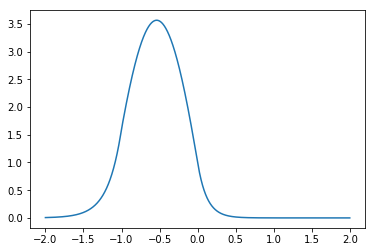

In [987]:
#モード0
plt.plot(xs,y)

In [990]:
#y
y2 = []
for i in range(len(xs)):
    y2.append(E(xs[i],n_1))

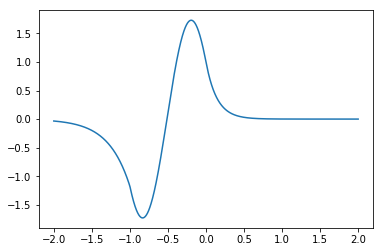

In [989]:
#モード1
plt.plot(xs,y2)